In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
colors_ns = {
    0: 'r',
    1: 'r',
    2: 'm',
    3: 'b',
    4: 'k',
    5: 'g'
}

In [3]:
def filter_df_by_n(df, filter_statement, ns, sorting_column):
    result = {}
    
    for n in ns:
        result[n] = df[filter_statement & (df['n'] == n)]
        result[n] = result[n].sort_values([sorting_column])
    
    return result

In [4]:
def filter_df(df, filter_statement, sorting_column):
    result = df[filter_statement]
    result = result.sort_values([sorting_column])
    
    return result

In [5]:
def plot_layers(dataframe, reference_dataframe, ns, num_nodes, ref_train=64, ref_nodes=None):
    if ref_nodes is None:
        ref_nodes = num_nodes
    
    pinn_statement = (dataframe['num_nodes'] == num_nodes)
    reference_statement = (reference_dataframe['num_nodes'] == ref_nodes) & (reference_dataframe['num_train'] == ref_train)
    
    data_pinn = filter_df_by_n(dataframe, pinn_statement, ns, 'num_dense')
    data_ref = filter_df_by_n(reference_dataframe, reference_statement, ns, 'num_dense')

    for n in ns:
        plt.plot(data_pinn[n]['num_dense'], data_pinn[n]['test_metric'], '{}*--'.format(colors_ns[n]), label='n = {}'.format(n))
        plt.plot(data_ref[n]['num_dense'], data_ref[n]['test_metric'], '{}-'.format(colors_ns[n]), label='n = {}, reference'.format(n))
    
    plt.xlabel('number of layers')
    plt.ylabel('L$_2$ relative error')
    plt.yscale('log')
    plt.legend()
    plt.savefig('layers.png')

In [6]:
def plot_nodes(dataframe, reference_dataframe, ns, num_dense, ref_train=64):
    pinn_statement = (dataframe['num_dense'] == num_dense)
    ref_statement = (reference_dataframe['num_dense'] == num_dense) & (reference_dataframe['num_train'] == ref_train)
    
    data_pinn = filter_df_by_n(dataframe, pinn_statement, ns, 'num_nodes')
    data_ref = filter_df_by_n(reference_dataframe, ref_statement, ns, 'num_nodes')
    
    for n in ns:
        plt.plot(data_pinn[n]['num_nodes'], data_pinn[n]['test_metric'], '{}*--'.format(colors_ns[n]), label='n = {}'.format(n))
        plt.plot(data_ref[n]['num_nodes'], data_ref[n]['test_metric'], '{}-'.format(colors_ns[n]), label='n = {}, reference'.format(n))
    
    plt.xlabel('number of nodes per layer')
    plt.ylabel('L$_2$ relative error')
    plt.yscale('log')
    plt.legend()
    plt.savefig('nodes.png')

In [21]:
df_function = pd.read_csv('function.csv')
df_pde = pd.read_csv('pde.csv')
df_generalised = pd.read_csv('generalised-n.csv')
df_ref_gen = pd.read_csv('function-generalised-n.csv')
df_quantum_1d = pd.read_csv('quantum-1d.csv')

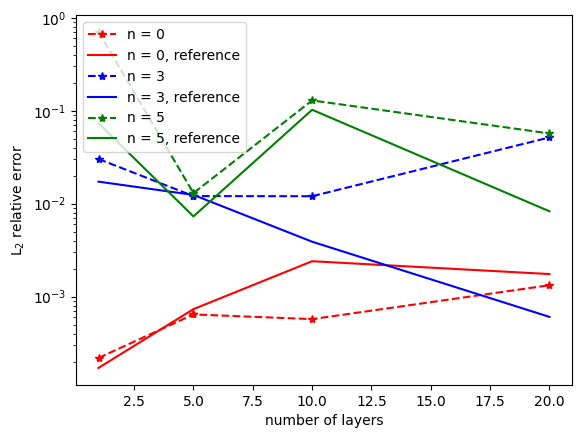

In [8]:
plot_layers(df_pde, df_function, [0, 3, 5], 20)

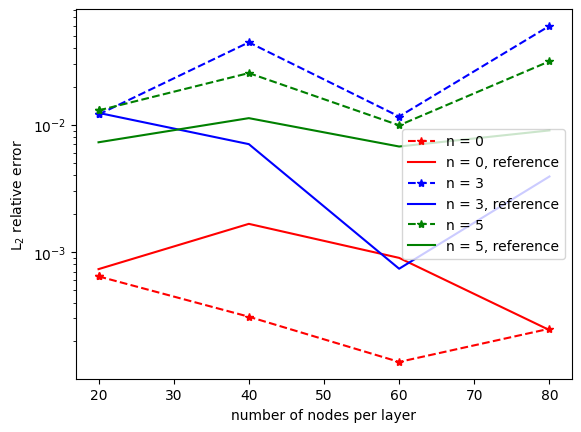

In [9]:
plot_nodes(df_pde, df_function, [0, 3, 5], 5)

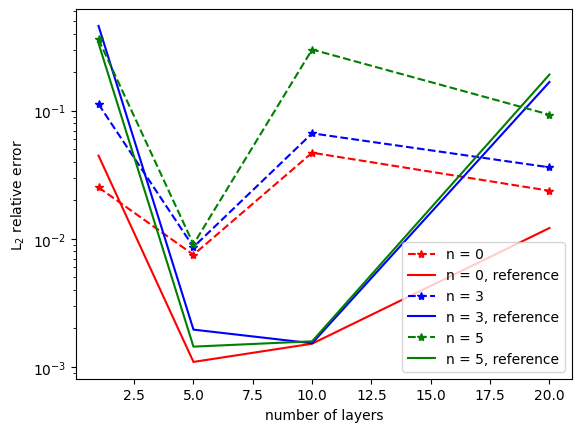

In [11]:
plot_layers(df_generalised, df_ref_gen, [0, 3, 5], 75, ref_train=4096)

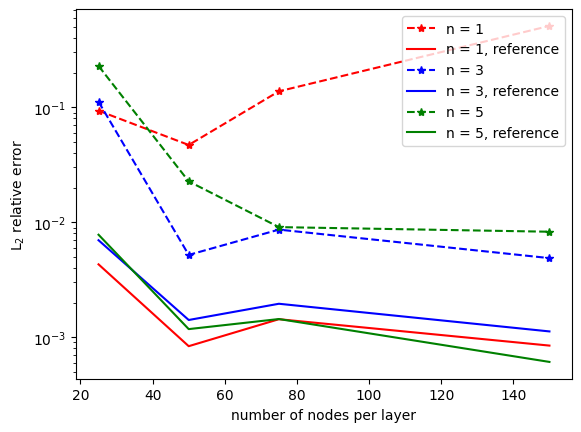

In [9]:
plot_nodes(df_generalised, df_ref_gen, [1, 3, 5], 5, ref_train=4096)

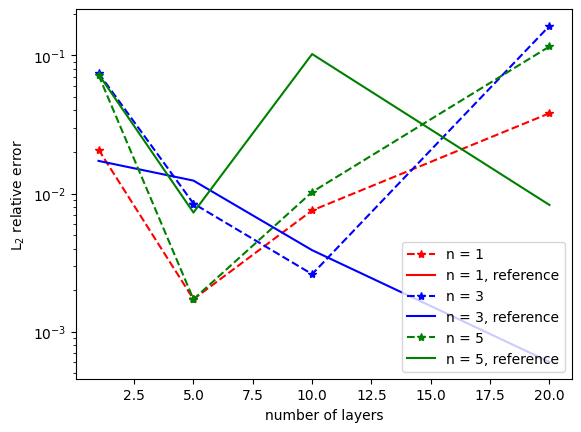

In [12]:
plot_layers(df_quantum_1d, df_function, [1, 3, 5], 20, ref_train=64)

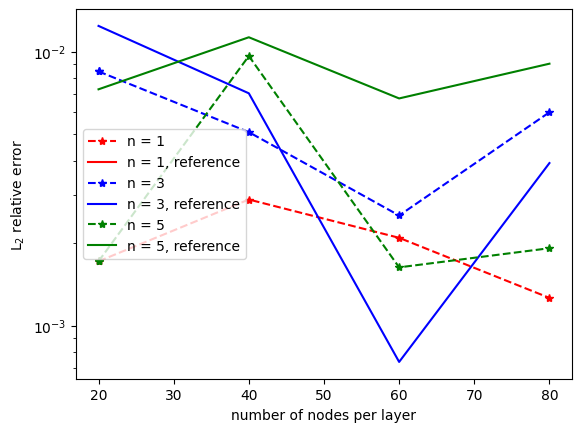

In [13]:
plot_nodes(df_quantum_1d, df_function, [1, 3, 5], 5, ref_train=64)

In [14]:
def extract_n_serie(df, num_dense, num_nodes):
    filter_statement = (df['num_dense'] == num_dense) & (df['num_nodes'] == num_nodes)
    df_filtered = filter_df(df, filter_statement, 'n')
    return df_filtered

In [22]:
pde_ns = extract_n_serie(df_pde, 5, 60)
pde_ns

,n,num_dense,num_nodes,num_train,num_test,weights,test_metric
24,0,5,60,64,100,1,0.000137
32,1,5,60,64,100,1,0.003531
25,2,5,60,64,100,1,0.002488
26,3,5,60,64,100,1,0.011618
33,4,5,60,64,100,1,0.014830
27,5,5,60,64,100,1,0.009907


In [23]:
gen_n_ns = extract_n_serie(df_generalised, 5, 50)
gen_n_ns.drop(gen_n_ns[gen_n_ns['n'] == 6].index, inplace=True)
gen_n_ns

,n,num_dense,num_nodes,num_train,num_test,weights,test_metric
35,0,5,50,1024,10000,1,0.014329
36,1,5,50,1024,10000,1,0.047043
37,2,5,50,1024,10000,1,0.008325
38,3,5,50,1024,10000,1,0.005200
39,4,5,50,1024,10000,1,0.002940
40,5,5,50,1024,10000,1,0.022684


In [24]:
gen_quantum_ns = extract_n_serie(df_quantum_1d, 5, 60)
gen_quantum_ns.drop(gen_quantum_ns[gen_quantum_ns['n'] == 6].index, inplace=True)
gen_quantum_ns

,n,num_dense,num_nodes,num_train,num_test,weights,test_metric
42,0,5,60,384,600,1,0.001362
43,1,5,60,384,600,1,0.002093
44,2,5,60,384,600,1,0.003204
45,3,5,60,384,600,1,0.002525
46,4,5,60,384,600,1,0.002992
47,5,5,60,384,600,1,0.001633


In [25]:
def plot_n_graph(df_pde, df_gen_n, df_quantum):
    plt.plot(df_pde['n'], df_pde['test_metric'], '*--', label='PINN for fixed n')
    plt.plot(df_gen_n['n'], df_gen_n['test_metric'], '*--', label='PINN for continuous n')
    plt.plot(df_quantum['n'], df_quantum['test_metric'], '*--', label='PINN for discrete n')
    
    plt.xlabel('n')
    plt.ylabel('L$_2$ relative error')
    plt.yscale('log')
    plt.legend()
    plt.savefig('ns.png')

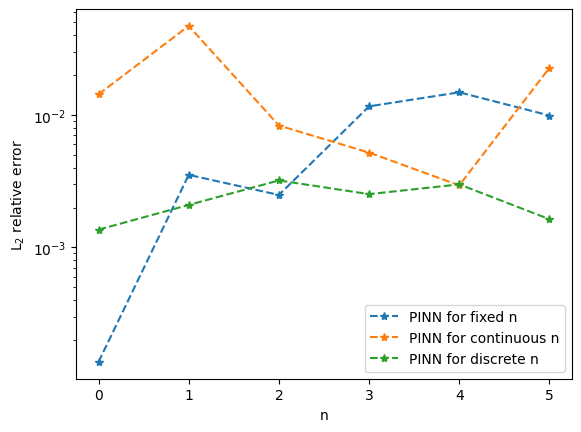

In [26]:
plot_n_graph(pde_ns, gen_n_ns, gen_quantum_ns)